<a href="https://colab.research.google.com/github/XANDENHOw/CursoDeExtensaoPythonPandas/blob/main/Segundo_exemplo_em_Python_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Inserção de dados, remoção de colunas, merge e gráficos.


  Data: 9 e 10 de fevereiro de 2023

In [1]:
#Import da biblioteca Pandas
import pandas as pd

combustiveis_df = pd.read_excel("ca-2021-02.xlsx")

In [2]:
print(combustiveis_df.head())

  Regiao - Sigla Estado - Sigla  Municipio               Revenda  \
0             NE             AL  ARAPIRACA  POSTO ARAPIRACA LTDA   
1             NE             AL  ARAPIRACA  POSTO ARAPIRACA LTDA   
2             NE             AL  ARAPIRACA  POSTO ARAPIRACA LTDA   
3             NE             AL  ARAPIRACA  POSTO ARAPIRACA LTDA   
4             NE             AL  ARAPIRACA  POSTO ARAPIRACA LTDA   

       CNPJ da Revenda     Nome da Rua Numero Rua Complemento       Bairro  \
0   12.451.076/0004-65  RODOVIA AL 220      105.0       KM 68  CANAFISTULA   
1   12.451.076/0004-65  RODOVIA AL 220      105.0       KM 68  CANAFISTULA   
2   12.451.076/0004-65  RODOVIA AL 220      105.0       KM 68  CANAFISTULA   
3   12.451.076/0004-65  RODOVIA AL 220      105.0       KM 68  CANAFISTULA   
4   12.451.076/0004-65  RODOVIA AL 220      105.0       KM 68  CANAFISTULA   

         Cep             Produto Data da Coleta  Valor de Venda  \
0  57302-605            GASOLINA     2021-11-01        

In [3]:
#Inserção simples de dados
combustiveis_df['Ativo'] = True
display(combustiveis_df.head())

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Ativo
0,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105.0,KM 68,CANAFISTULA,57302-605,GASOLINA,2021-11-01,6.799,NaN,R$ / litro,VIBRA ENERGIA,True
1,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105.0,KM 68,CANAFISTULA,57302-605,ETANOL,2021-11-01,5.299,NaN,R$ / litro,VIBRA ENERGIA,True
2,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105.0,KM 68,CANAFISTULA,57302-605,DIESEL,2021-11-01,5.549,NaN,R$ / litro,VIBRA ENERGIA,True
3,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105.0,KM 68,CANAFISTULA,57302-605,GASOLINA ADITIVADA,2021-11-01,6.899,NaN,R$ / litro,VIBRA ENERGIA,True
4,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105.0,KM 68,CANAFISTULA,57302-605,DIESEL S10,2021-11-01,5.649,NaN,R$ / litro,VIBRA ENERGIA,True


In [4]:
#Criar uma coluna 'Obs' escrito "Melhor Cidade" quando a coluna 'Municipio' for "TUBARAO"
combustiveis_df['Obs'] = ["Cidade Toppen" if municipio == 'TUBARAO' else 'Cidade Meia Boca' for municipio in combustiveis_df['Municipio']]
display(combustiveis_df.loc[combustiveis_df['Municipio'].isin(['TUBARAO', 'SAO PAULO']), ['Municipio', 'Obs']])



,Municipio,Obs
1601,SAO PAULO,Cidade Meia Boca
1602,SAO PAULO,Cidade Meia Boca
1603,SAO PAULO,Cidade Meia Boca
1604,SAO PAULO,Cidade Meia Boca
6416,SAO PAULO,Cidade Meia Boca
...,...,...
166128,TUBARAO,Cidade Toppen
166132,TUBARAO,Cidade Toppen
166133,TUBARAO,Cidade Toppen
166134,TUBARAO,Cidade Toppen


In [5]:
import numpy as np

combustiveis_df['Valor de Venda - Status'] = np.where(combustiveis_df['Valor de Venda'] > 5.5, 'Caro', 'Aceitável')
display(combustiveis_df[['Revenda', 'Valor de Venda', 'Valor de Venda - Status']])

,Revenda,Valor de Venda,Valor de Venda - Status
0,POSTO ARAPIRACA LTDA,6.799,Caro
1,POSTO ARAPIRACA LTDA,5.299,Aceitável
2,POSTO ARAPIRACA LTDA,5.549,Caro
3,POSTO ARAPIRACA LTDA,6.899,Caro
4,POSTO ARAPIRACA LTDA,5.649,Caro
...,...,...,...
168404,COMERCIAL DE COMBUSTIVEL CACHOEIRINHA LTDA,5.859,Caro
168405,ABC DISTRIBUICAO DE PETROLEO LTDA,6.580,Caro
168406,ABC DISTRIBUICAO DE PETROLEO LTDA,4.740,Aceitável
168407,ABC DISTRIBUICAO DE PETROLEO LTDA,5.448,Aceitável


In [6]:
num_hab_df = pd.read_csv("ibge_num_habitantes_estimado.csv", sep=";")
num_hab_df.rename(columns={"Estado":"Estado - Sigla"}, inplace=True)
display(num_hab_df)

,Municipio,Estado - Sigla,NumHabitantes2021
0,BELO HORIZONTE,MG,2530701
1,CAMPINAS,SP,1223237
2,CAMPO GRANDE,MS,916001
3,CURITIBA,PR,1963726
4,GOIANIA,GO,1555626
5,INDAIATUBA,SP,260690
6,NATAL,RN,803739
7,PALMAS,TO,313349
8,PENAPOLIS,SP,64098
9,PORTO ALEGRE,RS,1492530


In [7]:
#MERGE dos dois DF
colunas = ['Municipio' , 'Estado - Sigla']
merge_df = combustiveis_df.merge(num_hab_df, how="inner", on=colunas)
display(merge_df)
print(merge_df.info())

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Ativo,Obs,Valor de Venda - Status,NumHabitantes2021
0,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854.0,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,GASOLINA,2021-11-01,6.999,NaN,R$ / litro,RAIZEN,True,Cidade Meia Boca,Caro,1555626
1,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854.0,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,ETANOL,2021-11-01,4.990,NaN,R$ / litro,RAIZEN,True,Cidade Meia Boca,Aceitável,1555626
2,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854.0,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,GASOLINA ADITIVADA,2021-11-01,7.130,NaN,R$ / litro,RAIZEN,True,Cidade Meia Boca,Caro,1555626
3,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,NaN,VILA NOVA,74645-010,GASOLINA,2021-11-01,6.990,NaN,R$ / litro,BRANCA,True,Cidade Meia Boca,Caro,1555626
4,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,NaN,VILA NOVA,74645-010,ETANOL,2021-11-01,4.990,NaN,R$ / litro,BRANCA,True,Cidade Meia Boca,Aceitável,1555626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20629,SE,SP,INDAIATUBA,POSTO DOS ESTEVES LTDA,20.763.169/0001-00,AVENIDA ITORORO,160.0,NaN,CENTRO,13330-055,GASOLINA,2021-12-28,6.499,NaN,R$ / litro,IPIRANGA,True,Cidade Meia Boca,Caro,260690
20630,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496.0,NaN,CIDADE NOVA I,13334-170,DIESEL S10,2021-12-28,5.499,NaN,R$ / litro,RAIZEN,True,Cidade Meia Boca,Aceitável,260690
20631,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496.0,NaN,CIDADE NOVA I,13334-170,GASOLINA ADITIVADA,2021-12-28,6.699,NaN,R$ / litro,RAIZEN,True,Cidade Meia Boca,Caro,260690
20632,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496.0,NaN,CIDADE NOVA I,13334-170,ETANOL,2021-12-28,4.899,NaN,R$ / litro,RAIZEN,True,Cidade Meia Boca,Aceitável,260690


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20634 entries, 0 to 20633
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Regiao - Sigla           20634 non-null  object        
 1   Estado - Sigla           20634 non-null  object        
 2   Municipio                20634 non-null  object        
 3   Revenda                  20634 non-null  object        
 4   CNPJ da Revenda          20634 non-null  object        
 5   Nome da Rua              20634 non-null  object        
 6   Numero Rua               20634 non-null  object        
 7   Complemento              3837 non-null   object        
 8   Bairro                   20634 non-null  object        
 9   Cep                      20634 non-null  object        
 10  Produto                  20634 non-null  object        
 11  Data da Coleta           20634 non-null  datetime64[ns]
 12  Valor de Venda           20634 n

In [8]:
merge_df.dropna(axis=1, inplace=True)
print(merge_df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20634 entries, 0 to 20633
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Regiao - Sigla           20634 non-null  object        
 1   Estado - Sigla           20634 non-null  object        
 2   Municipio                20634 non-null  object        
 3   Revenda                  20634 non-null  object        
 4   CNPJ da Revenda          20634 non-null  object        
 5   Nome da Rua              20634 non-null  object        
 6   Numero Rua               20634 non-null  object        
 7   Bairro                   20634 non-null  object        
 8   Cep                      20634 non-null  object        
 9   Produto                  20634 non-null  object        
 10  Data da Coleta           20634 non-null  datetime64[ns]
 11  Valor de Venda           20634 non-null  float64       
 12  Unidade de Medida        20634 n

In [9]:
colunas=['Regiao - Sigla', 'Nome da Rua', 'Numero Rua', 'Bairro', 'Cep', 'Produto', 'Data da Coleta',
         'Valor de Venda', 'Unidade de Medida', 'Bandeira', 'Ativo', 'Valor de Venda - Status']
merge_df.drop(labels=colunas, axis=1, inplace=True)
print(merge_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20634 entries, 0 to 20633
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Estado - Sigla     20634 non-null  object
 1   Municipio          20634 non-null  object
 2   Revenda            20634 non-null  object
 3   CNPJ da Revenda    20634 non-null  object
 4   Obs                20634 non-null  object
 5   NumHabitantes2021  20634 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.1+ MB
None


In [10]:
display(merge_df.head(100))

,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Obs,NumHabitantes2021
0,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,Cidade Meia Boca,1555626
1,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,Cidade Meia Boca,1555626
2,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,Cidade Meia Boca,1555626
3,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,Cidade Meia Boca,1555626
4,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,Cidade Meia Boca,1555626
...,...,...,...,...,...,...
95,GO,GOIANIA,AUTO POSTO DONA SANTA LTDA.,08.232.672/0001-34,Cidade Meia Boca,1555626
96,GO,GOIANIA,AUTO POSTO DONA SANTA LTDA.,08.232.672/0001-34,Cidade Meia Boca,1555626
97,GO,GOIANIA,AUTO POSTO ANTENA 104 EIRELI,05.634.368/0001-25,Cidade Meia Boca,1555626
98,GO,GOIANIA,AUTO POSTO ANTENA 104 EIRELI,05.634.368/0001-25,Cidade Meia Boca,1555626


In [11]:
merge_df.drop_duplicates(inplace=True)
display(merge_df.head(100))

,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Obs,NumHabitantes2021
0,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,Cidade Meia Boca,1555626
3,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,Cidade Meia Boca,1555626
7,GO,GOIANIA,POSTO DN LTDA,05.413.136/0001-47,Cidade Meia Boca,1555626
11,GO,GOIANIA,POSTO ALDEIA LTDA,04.896.662/0001-42,Cidade Meia Boca,1555626
15,GO,GOIANIA,AUTO POSTO SANTA LUZIA LTDA,04.142.631/0001-04,Cidade Meia Boca,1555626
...,...,...,...,...,...,...
1677,RJ,RIO DE JANEIRO,POSTO SANTA CLARA DA PAVUNA II LTDA,06.955.648/0001-06,Cidade Meia Boca,6775561
1682,RJ,RIO DE JANEIRO,POSTO SANTA CLARA DA PAVUNA LTDA,03.246.347/0001-07,Cidade Meia Boca,6775561
1688,RJ,RIO DE JANEIRO,NOVA PARADINHA AUTO POSTO LTDA,07.594.094/0001-13,Cidade Meia Boca,6775561
1694,RJ,RIO DE JANEIRO,AUTO POSTO LUAR DA PENHA LTDA.,07.035.006/0001-43,Cidade Meia Boca,6775561


In [12]:
postos_municipio_df = merge_df.groupby(by=['Estado - Sigla', 'Municipio', 'NumHabitantes2021']).count()
postos_municipio_df.drop('CNPJ da Revenda', axis=1 , inplace=True)
postos_municipio_df.rename(columns={"Revenda":"Numero de Postos"}, inplace=True)
display(postos_municipio_df)

,,,Numero de Postos,Obs
Estado - Sigla,Municipio,NumHabitantes2021,,
AC,RIO BRANCO,419452,44,44
GO,GOIANIA,1555626,93,93
MG,BELO HORIZONTE,2530701,54,54
MS,CAMPO GRANDE,916001,104,104
PR,CURITIBA,1963726,110,110
RJ,RIO DE JANEIRO,6775561,379,379
RN,NATAL,803739,37,37
RO,PORTO VELHO,548952,40,40
RS,PORTO ALEGRE,1492530,73,73


In [15]:
postos_por_mun_df = merge_df.groupby(by=['Estado - Sigla', 'Municipio', 'NumHabitantes2021']).count()
postos_por_mun_df.reset_index(inplace=True)
postos_por_mun_df.drop('CNPJ da Revenda', axis=1, inplace=True)
postos_por_mun_df.rename(columns={"Revenda":"NumPostos"}, inplace=True)
postos_por_mun_df['NumHabitantesPorPosto'] = postos_por_mun_df['NumHabitantes2021'] / postos_por_mun_df['NumPostos']
display(postos_por_mun_df.info())
display(postos_por_mun_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Estado - Sigla         15 non-null     object 
 1   Municipio              15 non-null     object 
 2   NumHabitantes2021      15 non-null     int64  
 3   NumPostos              15 non-null     int64  
 4   Obs                    15 non-null     int64  
 5   NumHabitantesPorPosto  15 non-null     float64
dtypes: float64(1), int64(3), object(2)
memory usage: 848.0+ bytes


None

,Estado - Sigla,Municipio,NumHabitantes2021,NumPostos,Obs,NumHabitantesPorPosto
0,AC,RIO BRANCO,419452,44,44,9533.000000
1,GO,GOIANIA,1555626,93,93,16727.161290
2,MG,BELO HORIZONTE,2530701,54,54,46864.833333
3,MS,CAMPO GRANDE,916001,104,104,8807.701923
4,PR,CURITIBA,1963726,110,110,17852.054545
5,RJ,RIO DE JANEIRO,6775561,379,379,17877.469657
6,RN,NATAL,803739,37,37,21722.675676
7,RO,PORTO VELHO,548952,40,40,13723.800000
8,RS,PORTO ALEGRE,1492530,73,73,20445.616438
9,SP,CAMPINAS,1223237,51,51,23985.039216


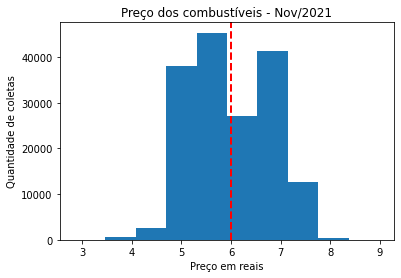

In [30]:
import matplotlib.pyplot as plt

plt.hist(combustiveis_df['Valor de Venda'])
plt.title("Preço dos combustíveis - Nov/2021")
plt.xlabel("Preço em reais")
plt.ylabel("Quantidade de coletas")
plt.axvline(combustiveis_df['Valor de Venda'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.show()

In [31]:
#Visualização do consumo médio
c_mean = combustiveis_df['Valor de Venda'].groupby(by=combustiveis_df['Produto']).mean()
display(c_mean)


Produto
DIESEL                5.375682
DIESEL S10            5.454901
ETANOL                5.456115
GASOLINA              6.708741
GASOLINA ADITIVADA    6.860422
GNV                   4.392935
Name: Valor de Venda, dtype: float64

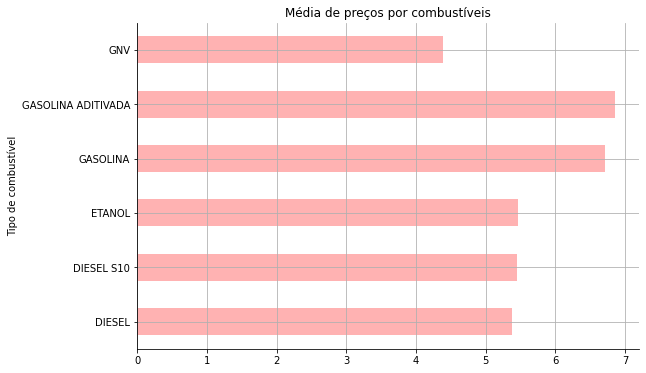

In [45]:
import seaborn as sns

#Definição da área do graf  
plt.figure(figsize=(9,6))

c_mean.plot(
    kind="barh",
    xlabel="Tipo de combustível",
    ylabel="Preço em reais/L",
    title="Média de preços por combustíveis",
    color="red",
    alpha=0.3
)

plt.grid()

sns.despine()

plt.show()

In [48]:
display(c_mean)
excel = "por_litro.xlsx"
c_mean.to_excel(excel, "Sumário")

Produto
DIESEL                5.375682
DIESEL S10            5.454901
ETANOL                5.456115
GASOLINA              6.708741
GASOLINA ADITIVADA    6.860422
GNV                   4.392935
Name: Valor de Venda, dtype: float64

In [59]:
#Vamos personalizar a planilha Excel...
from openpyxl import load_workbook
from openpyxl.styles import PatternFill, Font, Color, Alignment
#Abre o excel no openpyxl
#wb = workbook
wb = load_workbook(excel)
#pegar a planilha certa, usando o Sheet Name
#ws = work sheet(Planilha que será utilizada)
ws = wb['Sumário']

#Letes gou pintar o cabeçalho da tabela
cinzinha = PatternFill("solid", fgColor="CCCCCC")
coords = ['A1', 'B1']
for coord in coords:
  ws[coord].fill=cinzinha


#pintando de vermelho onde é caro
MAX_ROW = ws.max_row
num_linha = 2
while (num_linha <= MAX_ROW):
  coord = 'B'+str(num_linha) #coord="B{0}".format(num_linha)
  if ws[coord].value >= 6.0:
    ws[coord].font = Font(bold=True, color="FF0000")
  num_linha = num_linha + 1

#Salvar o excel

wb.save(excel)
